In [2]:
# -*- coding: utf-8 -*-

import datacube

def query(product,longitude, latitude, time, measurements, crs, output_crs, resolution):
    dc = datacube.Datacube(app="query")
    dataset = dc.load(
        product=product,
        longitude=longitude,
        latitude=latitude,
        time=time,
        measurements=measurements,
        crs=crs,
        output_crs=crs,
        resolution=resolution
    )
    
    return dataset

In [18]:
# lat: {begin: 4.730382754777383, end: 6.832229615259502}
# lon: {begin: -73.64405174149675, end: -71.58802736180444}

# Nueva 
# lat: {begin: 4.730276244728424, end: 6.8321755665761135}
# lon: {begin: -73.62512072277895, end: -71.56634540298535}
dataset = query(
    product='ls8_collections_sr_scene',
    longitude=(-73.62512072277895, -71.56634540298535),
    latitude=(4.730276244728424, 6.8321755665761135),
    time=('2021-01-29','2021-01-29'),
    measurements=['red'],
    crs='EPSG:4326',
    output_crs="EPSG:32719",
    resolution=(-0.01,0.01)
)

dataset

<xarray.Dataset>
Dimensions:      (latitude: 211, longitude: 207, time: 1)
Coordinates:
  * time         (time) datetime64[ns] 2021-01-29T15:06:18
  * latitude     (latitude) float64 6.835 6.825 6.815 ... 4.755 4.745 4.735
  * longitude    (longitude) float64 -73.62 -73.61 -73.61 ... -71.58 -71.56
    spatial_ref  int32 4326
Data variables:
    red          (time, latitude, longitude) int16 -9999 -9999 ... -9999 -9999
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

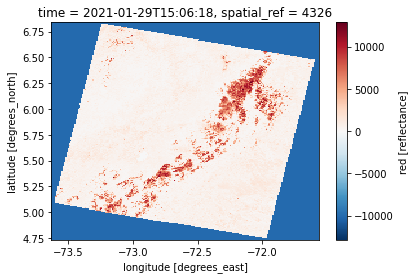

In [19]:
dataset.red[0].plot()

In [22]:
dataset.pixel_qa.attrs

{'units': 'bit_index',
 'nodata': 1,
 'flags_definition': {'pixel_qa': {'bits': [0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15],
   'values': {'1': 'Fill',
    '2': 'Clear',
    '4': 'Water',
    '8': 'Cloud shadow',
    '16': 'Snow',
    '32': 'Cloud',
    '64': 'Cloud Confidence Low Bit',
    '128': 'Cloud Confidence High Bit',
    '256': 'Cirrus Confidence Low Bit',
    '512': 'Cirrus Confidence High Bit',
    '1024': 'Unused',
    '2048': 'Unused',
    '4096': 'Unused',
    '8192': 'Unused',
    '16384': 'Unused',
    '32786': 'Unused'},
   'description': 'Level 2 Pixel Quality Band'}},
 'crs': 'EPSG:4326',
 'grid_mapping': 'spatial_ref'}

In [3]:
dataset.pixel_qa.attrs['flags_definition'] = str(dataset.pixel_qa.attrs['flags_definition'])

In [4]:
del dataset.time.attrs['units']

In [5]:
del dataset.pixel_qa.attrs['flags_definition']

In [6]:
dataset.time.encoding

{}

In [7]:
dataset.to_netcdf('dataset.nc')

In [38]:
!pip3 install matplotlib

    100% |████████████████████████████████| 11.5MB 111kB/s eta 0:00:01
    100% |████████████████████████████████| 2.2MB 618kB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
    100% |████████████████████████████████| 1.1MB 1.2MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/45/b2/6c7545bb7a38754d63048c7696804a0d947328125d81bf12beaa692c3ae3/numpy-1.19.5-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/ee/ff/48bde5c0f013094d729fe4b0316ba2a24774b3ff1c52d924a8a4cb04078a/six-1.15.0-py2.py3-none-any.whl


In [39]:
import xarray as xr
import matplotlib

In [40]:
ds = xr.open_dataset('median_0.nc')
ds

<xarray.Dataset>
Dimensions:      (latitude: 11133, longitude: 11148, time: 1)
Coordinates:
  * time         (time) datetime64[ns] 2020-12-12T15:06:31
  * latitude     (latitude) float64 6.0 6.0 6.0 6.0 6.0 ... 5.0 5.0 5.0 5.0 5.0
  * longitude    (longitude) float64 -72.0 -72.0 -72.0 ... -71.0 -71.0 -71.0
    spatial_ref  int32 ...
Data variables:
    red          (time, latitude, longitude) int16 ...
    blue         (time, latitude, longitude) int16 ...
    green        (time, latitude, longitude) int16 ...
    pixel_qa     (time, latitude, longitude) int32 ...
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

In [49]:
ds.data_vars['crs'] = ds.attrs['crs']

TypeError: 'DataVariables' object does not support item assignment

In [44]:
ds.time.attrs['units'] = u"seconds since 1970-01-01 00:00:00"

In [56]:
ds.coords['spatial_ref']

<xarray.DataArray 'spatial_ref' ()>
array(4326, dtype=int32)
Coordinates:
    spatial_ref  int32 4326
Attributes:
    spatial_ref:        GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",63...
    grid_mapping_name:  latitude_longitude

In [57]:
ds.red[0].values 

array([[-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       ...,
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999]], dtype=int16)

In [64]:
!mkdir /indexed_storage/LC080070562021012901T1-SC20210309014144

In [65]:
!tar -xzvf /download_storage/LC080070562021012901T1-SC20210309014144.tar.gz -C /indexed_storage/LC080070562021012901T1-SC20210309014144

LC08_L1TP_007056_20210129_20210306_01_T1_pixel_qa.tif
LC08_L1TP_007056_20210129_20210306_01_T1_radsat_qa.tif
LC08_L1TP_007056_20210129_20210306_01_T1_sr_band1.tif
LC08_L1TP_007056_20210129_20210306_01_T1_sr_band2.tif
LC08_L1TP_007056_20210129_20210306_01_T1_sr_band3.tif
LC08_L1TP_007056_20210129_20210306_01_T1_sr_band4.tif
LC08_L1TP_007056_20210129_20210306_01_T1_sr_band5.tif
LC08_L1TP_007056_20210129_20210306_01_T1_sr_band6.tif
LC08_L1TP_007056_20210129_20210306_01_T1_sr_band7.tif
LC08_L1TP_007056_20210129_20210306_01_T1_sr_aerosol.tif
LC08_L1TP_007056_20210129_20210306_01_T1.xml
